# Fig 5
## Repeat-containing peptides - repeat index >=3  

In [1]:
import pandas as pd 
import numpy as np 

## Collecting the non-VSA peptides and the repeat motifs present in them 
## 7-mer repeats with conservative subs allowed at all positions 

# The input file below can be obtained by running the code for Fig 4 
df_hits = pd.read_csv('HITS_Round2_Pfonly_250kfil_techclean_3zscorefil_5patientsfil_withrepeatinfo_7mer_conservativesubs.csv',header=0,index_col=0)

print (df_hits.shape)

## Classifying peptides into repeats and non-repeats 

def repeat(row):
    
    freq = row.max_freq
    if freq >= 3:
        repeat = 'yes'
    else:
        repeat = 'no'
    return repeat

df_hits['repeat'] = df_hits.apply(repeat,axis=1)
 
df_hits_repeat = df_hits[df_hits['repeat']=='yes']
df_hits_norepeat = df_hits[df_hits['repeat']=='no']

print ('The number of peptides WITH repeats is ' + str(df_hits_repeat.shape[0]))
print ('The number of peptides WITHOUT repeats is ' + str(df_hits_norepeat.shape[0]))

## Take the peptides with repeats and collapse them based on repeat similarity so that repeat containing peptides are not redundantly counted 

import ast 
def collapse(df):
    motif_list = []
    for index, row in df.iterrows():
       
        motif = list(ast.literal_eval((row.sevenmer).split('-p1')[1]))
        motif = set([(row.sevenmer).split('-p1')[0]+x for x in motif]) ## retain the protein with the motifs so that motifs across proteins aree not collapsed 
        motif_list.append(motif)

### collect the indices of rows that represent redundant motifs once and remove rows that share at least one motif element with these indices
    ### Rationale is that if they share the samee element for top sevenmer, then their sevenmer freq will be same too 
    unique = set()
    common = set()
    i = 0
    for i in range(0,len(motif_list)):
        if i not in common:
            for j in range(0,len(motif_list)):
                if i != j:
                    match = motif_list[i].intersection(motif_list[j])
                    
                    if len(match)>0:
                        unique.add(i)
                        common.add(j)
                    else:
                        unique.add(i)  
                                   
    return list(unique)

df_hits_repeat_collpased = df_hits_repeat.iloc[:,np.r_[0:199,-3,-2,-1]]
df_hits_norepeat_collpased = df_hits_norepeat.iloc[:,np.r_[0:199,-3,-2,-1]]

collapsed_hit_count=[]
for i in range(0,199): ## collapsing peptide hits in each sample 
    if i%50 == 0:
        print (i)
    re_sample_df = df_hits_repeat_collpased.iloc[:,[i,-3]]
    re_sample_df.columns = ['sample','sevenmer']
    re_sample_df = re_sample_df[re_sample_df['sample']>0] ## only collect peptides which are hits in that sample 
 
    re_retained_rowindex = collapse(re_sample_df)
    ### remove IT orthologs of Antigen 332, gametocyte specific protein and FIKK 
    nhits = (re_sample_df.iloc[re_retained_rowindex].drop(re_sample_df.iloc[re_retained_rowindex].filter(regex='PFIT_1149200|PFIT_1037600|PFIT_0422900',axis=0).index,axis=0).shape[0])
    collapsed_hit_count.append(nhits)

collapsed_hit_count.append('NA') ## foor last column of max_sevenmer
collapsed_hit_count.append('NA') 
collapsed_hit_count.append('NA') 
df_hits_repeat_collpased.loc['repeat hits'] = collapsed_hit_count

### collapse the non-repeats as well so that overlapping peptides are counted once 

collapsed_hit_count=[]
for i in range(0,199): ## collapsing peptide hits in each sample 
    if i%50 == 0:
        print (i)
    re_sample_df = df_hits_norepeat_collpased.iloc[:,[i,-3]]
    re_sample_df.columns = ['sample','sevenmer']
    re_sample_df = re_sample_df[re_sample_df['sample']>0] ## only collect peptides which are hits in that sample 
 
    re_retained_rowindex = collapse(re_sample_df)
    ### remove IT orthologs of Antigen 332, gametocyte specific protein and FIKK 
    nhits = (re_sample_df.iloc[re_retained_rowindex].drop(re_sample_df.iloc[re_retained_rowindex].filter(regex='PFIT_1149200|PFIT_1037600|PFIT_0422900',axis=0).index,axis=0).shape[0])
    collapsed_hit_count.append(nhits)

collapsed_hit_count.append('NA') ## foor last column of max_sevenmer
collapsed_hit_count.append('NA') 
collapsed_hit_count.append('NA') 
df_hits_norepeat_collpased.loc['NO repeat hits'] = collapsed_hit_count



(5171, 291)
The number of peptides WITH repeats is 2372
The number of peptides WITHOUT repeats is 2799
0
50
100
150


/data/madhura/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
50
100
150


# Breadth of repeats and non repeats 

The number of repeat peptides is 
202
The number of NO repeat peptides is 
202
(198, 20)
(198, 20)
child_2_3 10 9
75.0
90.0
EIR moderate high NO repeat KstestResult(statistic=0.3888888888888889, pvalue=0.342873844421832)
child_4_6 30 30
97.0
94.5
EIR moderate high NO repeat KstestResult(statistic=0.2, pvalue=0.5940706297759378)
child_7_11 30 30
95.5
101.0
EIR moderate high NO repeat KstestResult(statistic=0.16666666666666666, pvalue=0.8079631540901643)
adult 30 29
125.5
113.0
EIR moderate high NO repeat KstestResult(statistic=0.2218390804597701, pvalue=0.383995343068665)


child_2_3 10 9
26.0
52.0
EIR moderate high Repeats KstestResult(statistic=0.6666666666666666, pvalue=0.020979020979021046)
child_4_6 30 30
30.5
53.5
EIR moderate high Repeats KstestResult(statistic=0.5, pvalue=0.0008995776840176799)
child_7_11 30 30
36.5
69.0
EIR moderate high Repeats KstestResult(statistic=0.6666666666666666, pvalue=1.2750060342394341e-06)
adult 30 29
88.5
83.0
EIR moderate high Repeats KstestResult

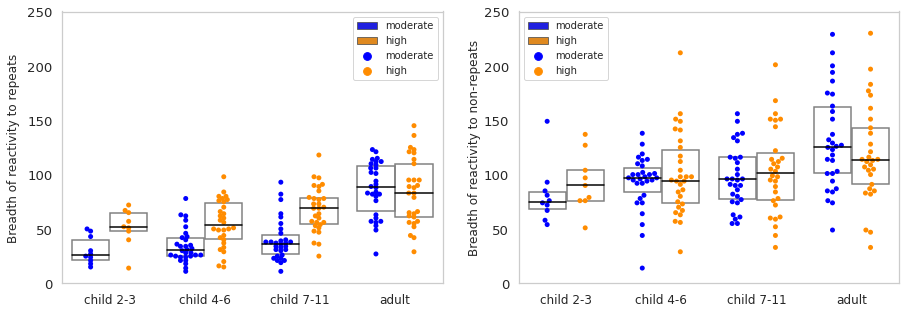

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import statistics

df_meta = pd.read_excel("Ugandan_samples_metadata.xlsx",header=0,index_col = 'Barcode',engine='openpyxl') ##sample name is the index


print ("The number of repeat peptides is ")
print (df_hits_repeat_collpased.shape[1])
print ("The number of NO repeat peptides is ")
print (df_hits_norepeat_collpased.shape[1])



df_hits_nonrepeat_meta_combined = pd.merge(df_hits_norepeat_collpased.loc['NO repeat hits'], df_meta, left_index=True, right_index=True)
print (df_hits_nonrepeat_meta_combined.shape)

df_hits_repeat_meta_combined = pd.merge(df_hits_repeat_collpased.loc['repeat hits'], df_meta, left_index=True, right_index=True)
print (df_hits_repeat_meta_combined.shape)


from matplotlib import pyplot as plt 
import seaborn as sns
import scipy
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'axes.grid' : False})

def childadult(row):
    age = row.age

    if (age >=7) & (age <= 11):
        status = 'child_7_11'

    elif (age >= 2) & (age < 4):
        status = 'child_2_3'

    elif (age >= 4) & (age < 7):
        status = 'child_4_6'

    else:
        status = 'adult'

    return status

def agecut(row):
    age = row.age

    if (age >= 2) & (age < 4):
        agecut = '2-3'

    elif (age >= 4) & (age < 7):
        agecut = '4-6'
    elif (age >= 7) & (age < 11):
        agecut = '7-11'
    else:
        agecut = '>18'
    return agecut

df_hits_nonrepeat_meta_combined['status'] = df_hits_nonrepeat_meta_combined.apply(childadult,axis=1)
df_hits_nonrepeat_meta_combined['agecut'] = df_hits_nonrepeat_meta_combined.apply(agecut,axis=1)


child_2_4_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'child_2_3'].eir_geom3
child_4_7_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'child_4_6'].eir_geom3
child_7_11_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'child_7_11'].eir_geom3
adult_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'adult'].eir_geom3

df_hits_repeat_meta_combined['status'] = df_hits_repeat_meta_combined.apply(childadult,axis=1)
df_hits_repeat_meta_combined['agecut'] = df_hits_repeat_meta_combined.apply(agecut,axis=1)


child_2_4_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'child_2_3'].eir_geom3
child_4_7_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'child_4_6'].eir_geom3
child_7_11_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'child_7_11'].eir_geom3
adult_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'adult'].eir_geom3


def eircut(row):
    eir = row.eir_geom3
    status = row.status

    if status == 'child_2_3':
        eir_50percent = child_2_4_eir_geom3.quantile(q=0.5)

    elif status == 'child_4_6':
        eir_50percent = child_4_7_eir_geom3.quantile(q=0.5)

    elif status == 'child_7_11':
        eir_50percent = child_7_11_eir_geom3.quantile(q=0.5)

    elif status == 'adult':
        eir_50percent = adult_eir_geom3.quantile(q=0.5)



    if eir <= eir_50percent:
        eir_cut = 'moderate'


    else:
        eir_cut = 'high'
    return eir_cut

df_hits_repeat_meta_combined['eircut'] = df_hits_repeat_meta_combined.apply(eircut,axis=1)
df_hits_nonrepeat_meta_combined['eircut'] = df_hits_nonrepeat_meta_combined.apply(eircut,axis=1)


fig, ax = plt.subplots(1,2,figsize=(15,5))

palette = {'moderate':'blue','high':'darkorange'}
sns.swarmplot(x="status", y="NO repeat hits", data=df_hits_nonrepeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],ax=ax[1])
sns.boxplot(medianprops={'visible': True,'color':'black'},
            whiskerprops={'visible': False},
            zorder=10,
            x="status", y="NO repeat hits", data=df_hits_nonrepeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],
            showfliers=False,
            showbox=True,
            showcaps=False,
            boxprops={'facecolor':'none', 'edgecolor':'grey'},
            ax=ax[1])

ax[1].set_ylabel('Breadth of reactivity to non-repeats',labelpad =3,size=12)

sns.swarmplot(x="status", y="repeat hits", data=df_hits_repeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],ax=ax[0])
sns.boxplot( medianprops={'visible': True,'color':'black'},
            whiskerprops={'visible': False},
            zorder=10,
            x="status", y="repeat hits", data=df_hits_repeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],
            showfliers=False,
            showbox=True,
            showcaps=False,
            boxprops={'facecolor':'none', 'edgecolor':'grey'},
            ax=ax[0])


ax[0].set_ylabel('Breadth of reactivity to repeats',labelpad =7,size=12)

ax[0].set_xticklabels(['child 2-3','child 4-6','child 7-11','adult'],size=12)
ax[1].set_xticklabels(['child 2-3','child 4-6','child 7-11','adult'],size=12)
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].legend_.set_title(None)
ax[1].legend_.set_title(None)
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)
ax[0].set_ylim(0,250)
ax[1].set_ylim(0,250)

# plt.savefig('Fig5.pdf',dpi=800)



lis2 = ['child_2_3','child_4_6','child_7_11','adult']
for i in lis2:
    age = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status']== i]

    first = list(age[age['eircut']== 'moderate']['NO repeat hits'])
    second = list(age[age['eircut']== 'high']['NO repeat hits'])

    print (i, len(first), len(second))
    print (statistics.median(first))
    print (statistics.median(second))
    p_value_12 = scipy.stats.ks_2samp(first,second)

    print ("EIR","moderate","high",'NO repeat',p_value_12)
print ('\n')


lis2 = ['child_2_3','child_4_6','child_7_11','adult']
for i in lis2:
    age = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status']== i]

    first = list(age[age['eircut']== 'moderate']['repeat hits'])
    second = list(age[age['eircut']== 'high']['repeat hits'])

    print (i, len(first), len(second))
    print (statistics.median(first))
    print (statistics.median(second))
    p_value_12 = scipy.stats.ks_2samp(first,second)

    print ("EIR","moderate","high",'Repeats',p_value_12)

print ('\n')

lis2 = ['moderate','high']
for i in lis2:
    eir = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['eircut']== i]

    first = list(eir[eir['status']== 'child_2_3']['repeat hits'])
    second = list(eir[eir['status']== 'child_4_6']['repeat hits'])
    third = list(eir[eir['status']== 'child_7_11']['repeat hits'])
    fourth = list(eir[eir['status']== 'adult']['repeat hits'])

    
    print (statistics.median(first))
    print (statistics.median(second))
    print (statistics.median(third))
    print (statistics.median(fourth))
    p_value_12 = scipy.stats.ks_2samp(first,second)
    print (i,'2-3','4-6','Repeats',p_value_12)
    p_value_13 = scipy.stats.ks_2samp(first,third)
    print (i,'2-3','7-11','Repeats',p_value_13)
    p_value_14 = scipy.stats.ks_2samp(first,fourth)
    print (i,'2-3','adult','Repeats',p_value_14)
    p_value_23 = scipy.stats.ks_2samp(second,third)
    print (i,'4-6','7-11','Repeats',p_value_23)
    p_value_24 = scipy.stats.ks_2samp(second,fourth)
    print (i,'4-6','adult','Repeats',p_value_24)
    p_value_34 = scipy.stats.ks_2samp(third,fourth)
    print (i,'7-11','adult','Repeats',p_value_34)

lis2 = ['moderate','high']
for i in lis2:
    eir = df_hits_nonrepeat_meta_combined[df_hits_repeat_meta_combined['eircut']== i]

    first = list(eir[eir['status']== 'child_2_3']['NO repeat hits'])
    second = list(eir[eir['status']== 'child_4_6']['NO repeat hits'])
    third = list(eir[eir['status']== 'child_7_11']['NO repeat hits'])
    fourth = list(eir[eir['status']== 'adult']['NO repeat hits'])

    
    print (statistics.median(first))
    print (statistics.median(second))
    print (statistics.median(third))
    print (statistics.median(fourth))
    p_value_12 = scipy.stats.ks_2samp(first,second)
    print (i,'2-3','4-6','No_repeats',p_value_12)
    p_value_13 = scipy.stats.ks_2samp(first,third)
    print (i,'2-3','7-11','No_repeats',p_value_13)
    p_value_14 = scipy.stats.ks_2samp(first,fourth)
    print (i,'2-3','adult','No_repeats',p_value_14)
    p_value_23 = scipy.stats.ks_2samp(second,third)
    print (i,'4-6','7-11','No_repeats',p_value_23)
    p_value_24 = scipy.stats.ks_2samp(second,fourth)
    print (i,'4-6','adult','No_repeats',p_value_24)
    p_value_34 = scipy.stats.ks_2samp(third,fourth)
    print (i,'7-11','adult','No_repeats',p_value_34)


## Fig 5-Supplement 1 -  ## Repeat-containing peptides - repeat index >=4  

In [3]:
import pandas as pd 
import numpy as np 

## Collecting the non-VSA peptides and the repeat motifs present in them 
## 7-mer repeats with conservative subs allowed at all positions 

df_hits = pd.read_csv('/data/madhura/sequencing/Falciparome_phage/20200123_novaseq_IPv6_PlateKanunguTororo/Analysis/HITS_Round2_Pfonly_250kfil_techclean_3zscorefil_5patientsfil_withrepeatinfo_7mer_conservativesubs.csv',header=0,index_col=0)

print (df_hits.shape)

## Classifying peptides into repeats and non-repeats 

def repeat(row):
    
    freq = row.max_freq
    if freq >= 4:
        repeat = 'yes'
    elif freq < 4:
        repeat = 'no'
    else:
        repeat = ''
    return repeat

df_hits['repeat'] = df_hits.apply(repeat,axis=1)
 
df_hits_repeat = df_hits[df_hits['repeat']=='yes']
df_hits_norepeat = df_hits[df_hits['repeat']=='no']

print ('The number of peptides WITH repeats is ' + str(df_hits_repeat.shape[0]))
print ('The number of peptides WITHOUT repeats is ' + str(df_hits_norepeat.shape[0]))

## Take the peptides with repeats and collapse them based on repeat similarity so that repeat containing peptides are not redundantly counted 

import ast 
def collapse(df):
    motif_list = []
    for index, row in df.iterrows():
       
        motif = list(ast.literal_eval((row.sevenmer).split('-p1')[1]))
        motif = set([(row.sevenmer).split('-p1')[0]+x for x in motif]) ## retain the protein with the motifs so that motifs across proteins aree not collapsed 
        motif_list.append(motif)

### collect the indices of rows that represent redundant motifs once and remove rows that share at least one motif element with these indices
    ### Rationale is that if they share the samee element for top sevenmer, then their sevenmer freq will be same too 
    unique = set()
    common = set()
    i = 0
    for i in range(0,len(motif_list)):
        if i not in common:
            for j in range(0,len(motif_list)):
                if i != j:
                    match = motif_list[i].intersection(motif_list[j])
                    
                    if len(match)>0:
                        unique.add(i)
                        common.add(j)
                    else:
                        unique.add(i)  
                                   
    return list(unique)

df_hits_repeat_collpased = df_hits_repeat.iloc[:,np.r_[0:199,-3,-2,-1]]
df_hits_norepeat_collpased = df_hits_norepeat.iloc[:,np.r_[0:199,-3,-2,-1]]

collapsed_hit_count=[]
for i in range(0,199): ## collapsing peptide hits in each sample 
    if i%50 == 0:
        print (i)
    re_sample_df = df_hits_repeat_collpased.iloc[:,[i,-3]]
    re_sample_df.columns = ['sample','sevenmer']
    re_sample_df = re_sample_df[re_sample_df['sample']>0] ## only collect peptides which are hits in that sample 
 
    re_retained_rowindex = collapse(re_sample_df)
    ### remove IT orthologs of Antigen 332, gametocyte specific protein and FIKK 
    nhits = (re_sample_df.iloc[re_retained_rowindex].drop(re_sample_df.iloc[re_retained_rowindex].filter(regex='PFIT_1149200|PFIT_1037600|PFIT_0422900',axis=0).index,axis=0).shape[0])
    collapsed_hit_count.append(nhits)

collapsed_hit_count.append('NA') ## foor last column of max_sevenmer
collapsed_hit_count.append('NA') 
collapsed_hit_count.append('NA') 
df_hits_repeat_collpased.loc['repeat hits'] = collapsed_hit_count

### collapse the non-repeats as well so that overlapping peptides are counted once 

collapsed_hit_count=[]
for i in range(0,199): ## collapsing peptide hits in each sample 
    if i%50 == 0:
        print (i)
    re_sample_df = df_hits_norepeat_collpased.iloc[:,[i,-3]]
    re_sample_df.columns = ['sample','sevenmer']
    re_sample_df = re_sample_df[re_sample_df['sample']>0] ## only collect peptides which are hits in that sample 
 
    re_retained_rowindex = collapse(re_sample_df)
    ### remove IT orthologs of Antigen 332, gametocyte specific protein and FIKK 
    nhits = (re_sample_df.iloc[re_retained_rowindex].drop(re_sample_df.iloc[re_retained_rowindex].filter(regex='PFIT_1149200|PFIT_1037600|PFIT_0422900',axis=0).index,axis=0).shape[0])
    collapsed_hit_count.append(nhits)

collapsed_hit_count.append('NA') ## foor last column of max_sevenmer
collapsed_hit_count.append('NA') 
collapsed_hit_count.append('NA') 
df_hits_norepeat_collpased.loc['NO repeat hits'] = collapsed_hit_count




(5171, 291)
The number of peptides WITH repeats is 2040
The number of peptides WITHOUT repeats is 3131
0
50
100
150
0
50
100
150


The number of repeat peptides is 
202
The number of NO repeat peptides is 
202
(198, 20)
(198, 20)
child_2_3 10 9
79.5
98.0
EIR moderate high NO repeat KstestResult(statistic=0.37777777777777777, pvalue=0.3925826495485938)
child_4_6 30 30
103.0
106.0
EIR moderate high NO repeat KstestResult(statistic=0.23333333333333334, pvalue=0.39294501397971776)
child_7_11 30 30
101.0
117.0
EIR moderate high NO repeat KstestResult(statistic=0.2, pvalue=0.5940706297759378)
adult 30 29
143.0
130.0
EIR moderate high NO repeat KstestResult(statistic=0.2218390804597701, pvalue=0.383995343068665)


child_2_3 10 9
19.5
45.0
EIR moderate high Repeats KstestResult(statistic=0.6777777777777778, pvalue=0.01764489380588441)
child_4_6 30 30
24.5
44.0
EIR moderate high Repeats KstestResult(statistic=0.5333333333333333, pvalue=0.0002933405491362055)
child_7_11 30 30
28.0
54.0
EIR moderate high Repeats KstestResult(statistic=0.7333333333333333, pvalue=4.326943555111202e-08)
adult 30 29
69.5
67.0
EIR moderate high R

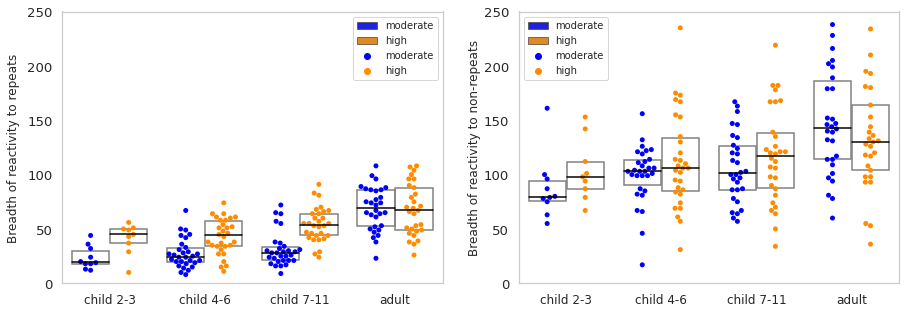

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import statistics

df_meta = pd.read_excel("/data/madhura/sequencing/Falciparome_phage/20200123_novaseq_IPv6_PlateKanunguTororo/Meta_data/200_samples_metadata_updated.xlsx",header=0,index_col = 'Barcode',engine='openpyxl') ##sample name is the index


print ("The number of repeat peptides is ")
print (df_hits_repeat_collpased.shape[1])
print ("The number of NO repeat peptides is ")
print (df_hits_norepeat_collpased.shape[1])


## Breadth of NON-Repeeat peptides sharing motifs with other genes 

df_hits_nonrepeat_meta_combined = pd.merge(df_hits_norepeat_collpased.loc['NO repeat hits'], df_meta, left_index=True, right_index=True)
print (df_hits_nonrepeat_meta_combined.shape)

df_hits_repeat_meta_combined = pd.merge(df_hits_repeat_collpased.loc['repeat hits'], df_meta, left_index=True, right_index=True)
print (df_hits_repeat_meta_combined.shape)


from matplotlib import pyplot as plt 
import seaborn as sns
import scipy
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'axes.grid' : False})

def childadult(row):
    age = row.age

    if (age >=7) & (age <= 11):
        status = 'child_7_11'

    elif (age >= 2) & (age < 4):
        status = 'child_2_3'

    elif (age >= 4) & (age < 7):
        status = 'child_4_6'

    else:
        status = 'adult'

    return status

def agecut(row):
    age = row.age

    if (age >= 2) & (age < 4):
        agecut = '2-3'

    elif (age >= 4) & (age < 7):
        agecut = '4-6'
    elif (age >= 7) & (age < 11):
        agecut = '7-11'
    else:
        agecut = '>18'
    return agecut

df_hits_nonrepeat_meta_combined['status'] = df_hits_nonrepeat_meta_combined.apply(childadult,axis=1)
df_hits_nonrepeat_meta_combined['agecut'] = df_hits_nonrepeat_meta_combined.apply(agecut,axis=1)


child_2_4_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'child_2_3'].eir_geom3
child_4_7_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'child_4_6'].eir_geom3
child_7_11_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'child_7_11'].eir_geom3
adult_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'adult'].eir_geom3

df_hits_repeat_meta_combined['status'] = df_hits_repeat_meta_combined.apply(childadult,axis=1)
df_hits_repeat_meta_combined['agecut'] = df_hits_repeat_meta_combined.apply(agecut,axis=1)


child_2_4_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'child_2_3'].eir_geom3
child_4_7_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'child_4_6'].eir_geom3
child_7_11_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'child_7_11'].eir_geom3
adult_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'adult'].eir_geom3


def eircut(row):
    eir = row.eir_geom3
    status = row.status

    if status == 'child_2_3':
        eir_50percent = child_2_4_eir_geom3.quantile(q=0.5)

    elif status == 'child_4_6':
        eir_50percent = child_4_7_eir_geom3.quantile(q=0.5)

    elif status == 'child_7_11':
        eir_50percent = child_7_11_eir_geom3.quantile(q=0.5)

    elif status == 'adult':
        eir_50percent = adult_eir_geom3.quantile(q=0.5)



    if eir <= eir_50percent:
        eir_cut = 'moderate'


    else:
        eir_cut = 'high'
    return eir_cut

df_hits_repeat_meta_combined['eircut'] = df_hits_repeat_meta_combined.apply(eircut,axis=1)
df_hits_nonrepeat_meta_combined['eircut'] = df_hits_nonrepeat_meta_combined.apply(eircut,axis=1)


fig, ax = plt.subplots(1,2,figsize=(15,5))

palette = {'moderate':'blue','high':'darkorange'}
sns.swarmplot(x="status", y="NO repeat hits", data=df_hits_nonrepeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],ax=ax[1])
sns.boxplot(medianprops={'visible': True,'color':'black'},
            whiskerprops={'visible': False},
            zorder=10,
            x="status", y="NO repeat hits", data=df_hits_nonrepeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],
            showfliers=False,
            showbox=True,
            showcaps=False,
            boxprops={'facecolor':'none', 'edgecolor':'grey'},
            ax=ax[1])

ax[1].set_ylabel('Breadth of reactivity to non-repeats',labelpad =3,size=12)

sns.swarmplot(x="status", y="repeat hits", data=df_hits_repeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],ax=ax[0])
sns.boxplot( medianprops={'visible': True,'color':'black'},
            whiskerprops={'visible': False},
            zorder=10,
            x="status", y="repeat hits", data=df_hits_repeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],
            showfliers=False,
            showbox=True,
            showcaps=False,
            boxprops={'facecolor':'none', 'edgecolor':'grey'},
            ax=ax[0])


ax[0].set_ylabel('Breadth of reactivity to repeats',labelpad =7,size=12)

ax[0].set_xticklabels(['child 2-3','child 4-6','child 7-11','adult'],size=12)
ax[1].set_xticklabels(['child 2-3','child 4-6','child 7-11','adult'],size=12)
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].legend_.set_title(None)
ax[1].legend_.set_title(None)
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)
ax[0].set_ylim(0,250)
ax[1].set_ylim(0,250)

plt.savefig('FigS5a_breadth_repeathits_freq4repeatthreshold.pdf',dpi=800)



lis2 = ['child_2_3','child_4_6','child_7_11','adult']
for i in lis2:
    age = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status']== i]

    first = list(age[age['eircut']== 'moderate']['NO repeat hits'])
    second = list(age[age['eircut']== 'high']['NO repeat hits'])

    print (i, len(first), len(second))
    print (statistics.median(first))
    print (statistics.median(second))
    p_value_12 = scipy.stats.ks_2samp(first,second)

    print ("EIR","moderate","high",'NO repeat',p_value_12)
print ('\n')


lis2 = ['child_2_3','child_4_6','child_7_11','adult']
for i in lis2:
    age = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status']== i]

    first = list(age[age['eircut']== 'moderate']['repeat hits'])
    second = list(age[age['eircut']== 'high']['repeat hits'])

    print (i, len(first), len(second))
    print (statistics.median(first))
    print (statistics.median(second))
    p_value_12 = scipy.stats.ks_2samp(first,second)

    print ("EIR","moderate","high",'Repeats',p_value_12)

print ('\n')



## Fig 5-Supplement 1  - ## Repeat-containing peptides - repeat index >=5

In [1]:
import pandas as pd 
import numpy as np 

## Collecting the non-VSA peptides and the repeat motifs present in them 
## 7-mer repeats with conservative subs allowed at all positions 

df_hits = pd.read_csv('/data/madhura/sequencing/Falciparome_phage/20200123_novaseq_IPv6_PlateKanunguTororo/Analysis/HITS_Round2_Pfonly_250kfil_techclean_3zscorefil_5patientsfil_withrepeatinfo_7mer_conservativesubs.csv',header=0,index_col=0)

print (df_hits.shape)

## Classifying peptides into repeats and non-repeats 

def repeat(row):
    
    freq = row.max_freq
    if freq >= 5:
        repeat = 'yes'
    elif freq <5:
        repeat = 'no'
    else:
        repeat = '' 
    return repeat

df_hits['repeat'] = df_hits.apply(repeat,axis=1)
 
df_hits_repeat = df_hits[df_hits['repeat']=='yes']
df_hits_norepeat = df_hits[df_hits['repeat']=='no']

print ('The number of peptides WITH repeats is ' + str(df_hits_repeat.shape[0]))
print ('The number of peptides WITHOUT repeats is ' + str(df_hits_norepeat.shape[0]))

## Take the peptides with repeats and collapse them based on repeat similarity so that repeat containing peptides are not redundantly counted 

import ast 
def collapse(df):
    motif_list = []
    for index, row in df.iterrows():
       
        motif = list(ast.literal_eval((row.sevenmer).split('-p1')[1]))
        motif = set([(row.sevenmer).split('-p1')[0]+x for x in motif]) ## retain the protein with the motifs so that motifs across proteins aree not collapsed 
        motif_list.append(motif)

### collect the indices of rows that represent redundant motifs once and remove rows that share at least one motif element with these indices
    ### Rationale is that if they share the samee element for top sevenmer, then their sevenmer freq will be same too 
    unique = set()
    common = set()
    i = 0
    for i in range(0,len(motif_list)):
        if i not in common:
            for j in range(0,len(motif_list)):
                if i != j:
                    match = motif_list[i].intersection(motif_list[j])
                    
                    if len(match)>0:
                        unique.add(i)
                        common.add(j)
                    else:
                        unique.add(i)  
                                   
    return list(unique)

df_hits_repeat_collpased = df_hits_repeat.iloc[:,np.r_[0:199,-3,-2,-1]]
df_hits_norepeat_collpased = df_hits_norepeat.iloc[:,np.r_[0:199,-3,-2,-1]]

collapsed_hit_count=[]
for i in range(0,199): ## collapsing peptide hits in each sample 
    if i%50 == 0:
        print (i)
    re_sample_df = df_hits_repeat_collpased.iloc[:,[i,-3]]
    re_sample_df.columns = ['sample','sevenmer']
    re_sample_df = re_sample_df[re_sample_df['sample']>0] ## only collect peptides which are hits in that sample 
 
    re_retained_rowindex = collapse(re_sample_df)
    ### remove IT orthologs of Antigen 332, gametocyte specific protein and FIKK 
    nhits = (re_sample_df.iloc[re_retained_rowindex].drop(re_sample_df.iloc[re_retained_rowindex].filter(regex='PFIT_1149200|PFIT_1037600|PFIT_0422900',axis=0).index,axis=0).shape[0])
    collapsed_hit_count.append(nhits)

collapsed_hit_count.append('NA') ## foor last column of max_sevenmer
collapsed_hit_count.append('NA') 
collapsed_hit_count.append('NA') 
df_hits_repeat_collpased.loc['repeat hits'] = collapsed_hit_count

### collapse the non-repeats as well so that overlapping peptides are counted once 

collapsed_hit_count=[]
for i in range(0,199): ## collapsing peptide hits in each sample 
    if i%50 == 0:
        print (i)
    re_sample_df = df_hits_norepeat_collpased.iloc[:,[i,-3]]
    re_sample_df.columns = ['sample','sevenmer']
    re_sample_df = re_sample_df[re_sample_df['sample']>0] ## only collect peptides which are hits in that sample 
 
    re_retained_rowindex = collapse(re_sample_df)
    ### remove IT orthologs of Antigen 332, gametocyte specific protein and FIKK 
    nhits = (re_sample_df.iloc[re_retained_rowindex].drop(re_sample_df.iloc[re_retained_rowindex].filter(regex='PFIT_1149200|PFIT_1037600|PFIT_0422900',axis=0).index,axis=0).shape[0])
    collapsed_hit_count.append(nhits)

collapsed_hit_count.append('NA') ## foor last column of max_sevenmer
collapsed_hit_count.append('NA') 
collapsed_hit_count.append('NA') 
df_hits_norepeat_collpased.loc['NO repeat hits'] = collapsed_hit_count





(5171, 291)
The number of peptides WITH repeats is 1801
The number of peptides WITHOUT repeats is 3370
0
50
100
150


/data/madhura/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0
50
100
150


The number of repeat peptides is 
202
The number of NO repeat peptides is 
202
(198, 20)
(198, 20)
child_2_3 10 9
82.5
102.0
EIR moderate high NO repeat KstestResult(statistic=0.4888888888888889, pvalue=0.13534607807053634)
child_4_6 30 30
108.5
116.5
EIR moderate high NO repeat KstestResult(statistic=0.26666666666666666, pvalue=0.23907300248018645)
child_7_11 30 30
106.0
125.0
EIR moderate high NO repeat KstestResult(statistic=0.23333333333333334, pvalue=0.39294501397971776)
adult 30 29
159.0
145.0
EIR moderate high NO repeat KstestResult(statistic=0.2206896551724138, pvalue=0.39294501397971804)


child_2_3 10 9
17.0
38.0
EIR moderate high Repeats KstestResult(statistic=0.6777777777777778, pvalue=0.01764489380588441)
child_4_6 30 30
19.0
33.0
EIR moderate high Repeats KstestResult(statistic=0.4666666666666667, pvalue=0.0025300622362698397)
child_7_11 30 30
22.5
43.0
EIR moderate high Repeats KstestResult(statistic=0.6666666666666666, pvalue=1.2750060342394341e-06)
adult 30 29
56.0
49.

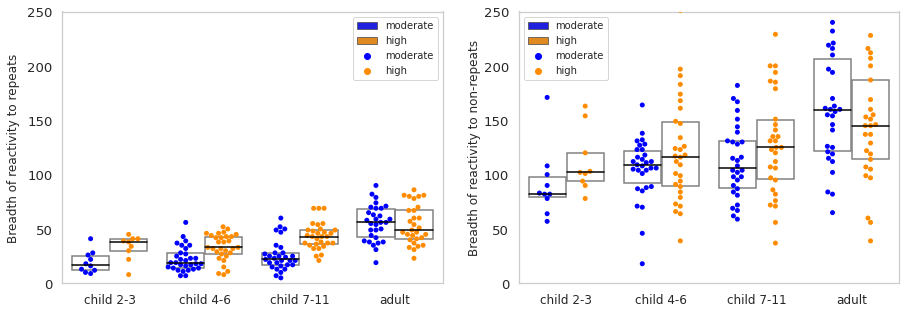

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import statistics

df_meta = pd.read_excel("/data/madhura/sequencing/Falciparome_phage/20200123_novaseq_IPv6_PlateKanunguTororo/Meta_data/200_samples_metadata_updated.xlsx",header=0,index_col = 'Barcode',engine='openpyxl') ##sample name is the index

print ("The number of repeat peptides is ")
print (df_hits_repeat_collpased.shape[1])
print ("The number of NO repeat peptides is ")
print (df_hits_norepeat_collpased.shape[1])


## Breadth of NON-Repeeat peptides sharing motifs with other genes 

df_hits_nonrepeat_meta_combined = pd.merge(df_hits_norepeat_collpased.loc['NO repeat hits'], df_meta, left_index=True, right_index=True)
print (df_hits_nonrepeat_meta_combined.shape)

df_hits_repeat_meta_combined = pd.merge(df_hits_repeat_collpased.loc['repeat hits'], df_meta, left_index=True, right_index=True)
print (df_hits_repeat_meta_combined.shape)


from matplotlib import pyplot as plt 
import seaborn as sns
import scipy
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'axes.grid' : False})

def childadult(row):
    age = row.age

    if (age >=7) & (age <= 11):
        status = 'child_7_11'

    elif (age >= 2) & (age < 4):
        status = 'child_2_3'

    elif (age >= 4) & (age < 7):
        status = 'child_4_6'

    else:
        status = 'adult'

    return status

def agecut(row):
    age = row.age

    if (age >= 2) & (age < 4):
        agecut = '2-3'

    elif (age >= 4) & (age < 7):
        agecut = '4-6'
    elif (age >= 7) & (age < 11):
        agecut = '7-11'
    else:
        agecut = '>18'
    return agecut

df_hits_nonrepeat_meta_combined['status'] = df_hits_nonrepeat_meta_combined.apply(childadult,axis=1)
df_hits_nonrepeat_meta_combined['agecut'] = df_hits_nonrepeat_meta_combined.apply(agecut,axis=1)


child_2_4_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'child_2_3'].eir_geom3
child_4_7_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'child_4_6'].eir_geom3
child_7_11_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'child_7_11'].eir_geom3
adult_eir_geom3 = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status'] == 'adult'].eir_geom3

df_hits_repeat_meta_combined['status'] = df_hits_repeat_meta_combined.apply(childadult,axis=1)
df_hits_repeat_meta_combined['agecut'] = df_hits_repeat_meta_combined.apply(agecut,axis=1)


child_2_4_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'child_2_3'].eir_geom3
child_4_7_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'child_4_6'].eir_geom3
child_7_11_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'child_7_11'].eir_geom3
adult_eir_geom3 = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status'] == 'adult'].eir_geom3


def eircut(row):
    eir = row.eir_geom3
    status = row.status

    if status == 'child_2_3':
        eir_50percent = child_2_4_eir_geom3.quantile(q=0.5)

    elif status == 'child_4_6':
        eir_50percent = child_4_7_eir_geom3.quantile(q=0.5)

    elif status == 'child_7_11':
        eir_50percent = child_7_11_eir_geom3.quantile(q=0.5)

    elif status == 'adult':
        eir_50percent = adult_eir_geom3.quantile(q=0.5)



    if eir <= eir_50percent:
        eir_cut = 'moderate'


    else:
        eir_cut = 'high'
    return eir_cut

df_hits_repeat_meta_combined['eircut'] = df_hits_repeat_meta_combined.apply(eircut,axis=1)
df_hits_nonrepeat_meta_combined['eircut'] = df_hits_nonrepeat_meta_combined.apply(eircut,axis=1)


fig, ax = plt.subplots(1,2,figsize=(15,5))

palette = {'moderate':'blue','high':'darkorange'}
sns.swarmplot(x="status", y="NO repeat hits", data=df_hits_nonrepeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],ax=ax[1])
sns.boxplot(medianprops={'visible': True,'color':'black'},
            whiskerprops={'visible': False},
            zorder=10,
            x="status", y="NO repeat hits", data=df_hits_nonrepeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],
            showfliers=False,
            showbox=True,
            showcaps=False,
            boxprops={'facecolor':'none', 'edgecolor':'grey'},
            ax=ax[1])

ax[1].set_ylabel('Breadth of reactivity to non-repeats',labelpad =3,size=12)

sns.swarmplot(x="status", y="repeat hits", data=df_hits_repeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],ax=ax[0])
sns.boxplot( medianprops={'visible': True,'color':'black'},
            whiskerprops={'visible': False},
            zorder=10,
            x="status", y="repeat hits", data=df_hits_repeat_meta_combined , order = ['child_2_3','child_4_6','child_7_11','adult'],  dodge=True,hue= 'eircut',palette = palette, hue_order=['moderate','high'],
            showfliers=False,
            showbox=True,
            showcaps=False,
            boxprops={'facecolor':'none', 'edgecolor':'grey'},
            ax=ax[0])


ax[0].set_ylabel('Breadth of reactivity to repeats',labelpad =7,size=12)

ax[0].set_xticklabels(['child 2-3','child 4-6','child 7-11','adult'],size=12)
ax[1].set_xticklabels(['child 2-3','child 4-6','child 7-11','adult'],size=12)
ax[0].set_xlabel('')
ax[1].set_xlabel('')

ax[0].legend_.set_title(None)
ax[1].legend_.set_title(None)
ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)
ax[0].set_ylim(0,250)
ax[1].set_ylim(0,250)

#ax[0].set_ylim(0,125)
#ax[1].set_ylim(0,125)
# # get legend information from the plot object
# handles, labels = ax.get_legend_handles_labels()

# # When creating the legend, only use the first two elements
# # to effectively remove the last two.
# l = plt.legend(handles[0:3], labels[0:3],title ='eircut')


# plt.savefig('FigS5a_breadth_repeathits_freq5repeatthreshold.pdf',dpi=800)


lis2 = ['child_2_3','child_4_6','child_7_11','adult']
for i in lis2:
    age = df_hits_nonrepeat_meta_combined[df_hits_nonrepeat_meta_combined['status']== i]

    first = list(age[age['eircut']== 'moderate']['NO repeat hits'])
    second = list(age[age['eircut']== 'high']['NO repeat hits'])

    print (i, len(first), len(second))
    print (statistics.median(first))
    print (statistics.median(second))
    p_value_12 = scipy.stats.ks_2samp(first,second)

    print ("EIR","moderate","high",'NO repeat',p_value_12)
print ('\n')


lis2 = ['child_2_3','child_4_6','child_7_11','adult']
for i in lis2:
    age = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['status']== i]

    first = list(age[age['eircut']== 'moderate']['repeat hits'])
    second = list(age[age['eircut']== 'high']['repeat hits'])

    print (i, len(first), len(second))
    print (statistics.median(first))
    print (statistics.median(second))
    p_value_12 = scipy.stats.ks_2samp(first,second)

    print ("EIR","moderate","high",'Repeats',p_value_12)

print ('\n')



# Scatter plot - repeat hits vs non-repeat hits per person 

Text(0, 0.5, 'breadth NON repeat hits')

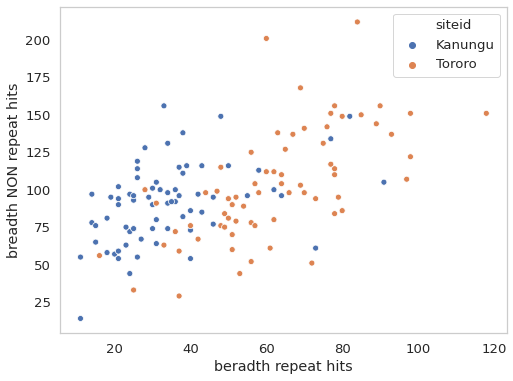

In [36]:
## comparing repeat and non-repeat hits 

new = df_hits_nonrepeat_meta_combined[df_hits_repeat_meta_combined['age']< 18][['age','NO repeat hits','siteid']]
new['repeat hits'] = df_hits_repeat_meta_combined[df_hits_repeat_meta_combined['age']< 18]['repeat hits']

fig,ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=new,x='repeat hits',y='NO repeat hits',hue='siteid')
plt.xlabel('beradth repeat hits')
plt.ylabel('breadth NON repeat hits')